**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-josh-finalproject/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-josh-finalproject/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

WILMINGTON PRICE INDEX(Y)    0
YEARLY SL (SEA LEVEL) (X)    0
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
0,0.011833,0.011833
1,-0.006667,-0.025167
2,-0.016000,-0.034667
3,-0.018521,-0.026083
4,-0.029250,-0.072167


In [7]:
C_test.isna().sum()

WILMINGTON PRICE INDEX(Y)    0
YEARLY SL (SEA LEVEL) (X)    0
dtype: int64

## import train and test data for Regression

In [9]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-josh-finalproject/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-josh-finalproject/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [10]:
R_train.isna().sum()

WILMINGTON PRICE INDEX(Y)    0
YEARLY SL (SEA LEVEL) (X)    0
dtype: int64

In [11]:
R_train=R_train.dropna()

In [12]:
R_test.isna().sum()

WILMINGTON PRICE INDEX(Y)    0
YEARLY SL (SEA LEVEL) (X)    0
dtype: int64

In [13]:
R_train.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
0,0.011833,0.011833
1,-0.006667,-0.025167
2,-0.016000,-0.034667
3,-0.018521,-0.026083
4,-0.029250,-0.072167


In [14]:
R_test.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
26,0.004233,0.027583
27,0.006692,-0.000333
28,0.012475,0.045583
29,0.014233,0.047083
30,0.029017,0.118417


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [15]:
C_train.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
0,0.011833,0.011833
1,-0.006667,-0.025167
2,-0.016000,-0.034667
3,-0.018521,-0.026083
4,-0.029250,-0.072167


In [18]:
X_train = pd.DataFrame(np.array(C_train['YEARLY SL (SEA LEVEL) (X)']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['WILMINGTON PRICE INDEX(Y)'].astype(int))

In [19]:
C_test.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
26,0.004233,0.027583
27,0.006692,-0.000333
28,0.012475,0.045583
29,0.014233,0.047083
30,0.029017,0.118417


In [21]:
X_test = pd.DataFrame(np.array(C_test['YEARLY SL (SEA LEVEL) (X)']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['WILMINGTON PRICE INDEX(Y)'].astype(int))

## Import base packages

In [22]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [25]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Evaluations

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


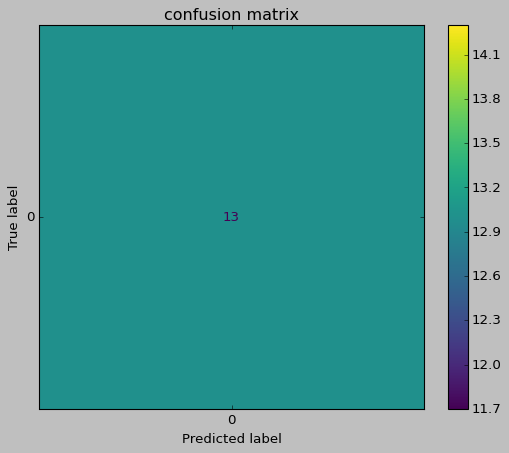

In [27]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [28]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-30-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [31]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


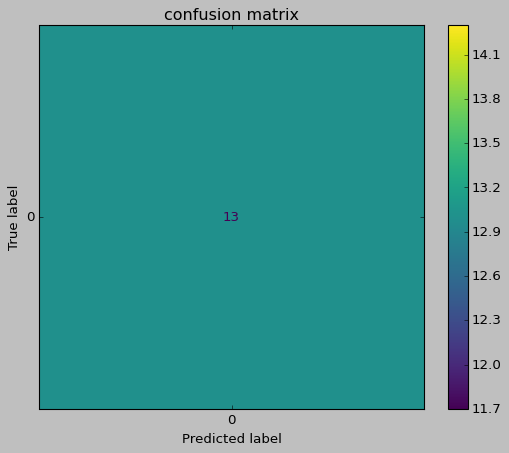

In [32]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [33]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


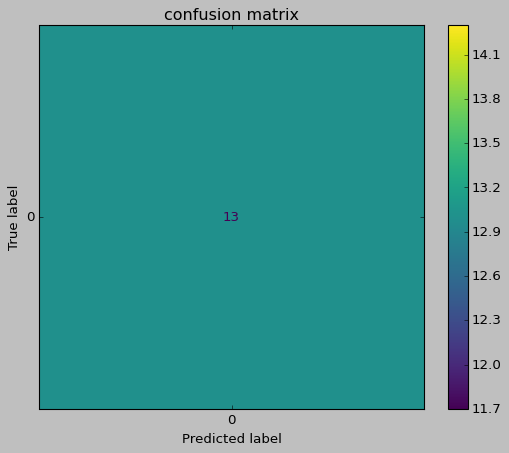

In [37]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [38]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.5 MB/s 
     |████████████████████████████████| 59 kB 8.4 MB/s 
     |████████████████████████████████| 226 kB 31.6 MB/s 
     |████████████████████████████████| 289 kB 5.3 MB/s 
     |████████████████████████████████| 286 kB 65.6 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 62 kB 795 kB/s 
     |████████████████████████████████| 802 kB 61.7 MB/s 
     |████████████████████████████████| 41 kB 507 kB/s 
     |████████████████████████████████| 132 kB 70.0 MB/s 
     |████████████████████████████████| 1.0 MB 45.2 MB/s 
     |████████████████████████████████| 60.2 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 68.9 MB/s 
     |████████████████████████████████| 280 kB 74.1 MB/s 
     |████████████████████████████████| 248 kB 73.3 MB/s 
  Installing build dependencies ... done


In [39]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [40]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [41]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [42]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    26
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	1 unique label values:  [0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 1
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12290.27 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of each feature based on

In [43]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")
print(predictor.problem_type)

multiclass


In [44]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=['accuracy', 'precision','recall','acc','f1'])

ValueError: ignored

# Machine Learning Regression

## important global packages

In [45]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [46]:
R_train.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
0,0.011833,0.011833
1,-0.006667,-0.025167
2,-0.016000,-0.034667
3,-0.018521,-0.026083
4,-0.029250,-0.072167


In [47]:
X_train = pd.DataFrame(R_train['WILMINGTON PRICE INDEX(Y)'])
y_train = pd.DataFrame(R_train['YEARLY SL (SEA LEVEL) (X)'])

In [48]:
R_test.head()

,WILMINGTON PRICE INDEX(Y),YEARLY SL (SEA LEVEL) (X)
26,0.004233,0.027583
27,0.006692,-0.000333
28,0.012475,0.045583
29,0.014233,0.047083
30,0.029017,0.118417


In [49]:
X_test = pd.DataFrame(R_test['WILMINGTON PRICE INDEX(Y)'])
y_test = pd.DataFrame(R_test['YEARLY SL (SEA LEVEL) (X)'])

## Linear Regression

In [50]:
from sklearn import linear_model

In [51]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [52]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.5260707997817775


In [53]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.005922
1,0.007760
2,0.012083
3,0.013397
4,0.024448
5,0.032048
6,0.043123
7,0.050754
8,0.062403
9,0.072245


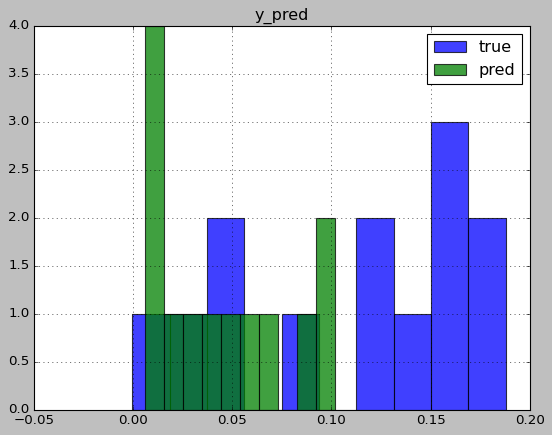

In [54]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-56-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [57]:
# calculate R2
from sklearn.metrics import r2_score

In [58]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -3.2001247369245576


In [59]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.010277
1,0.018352
2,0.017578
3,-0.006434
4,0.003777
5,0.003777
6,0.003777
7,0.003777
8,0.003777
9,0.003777


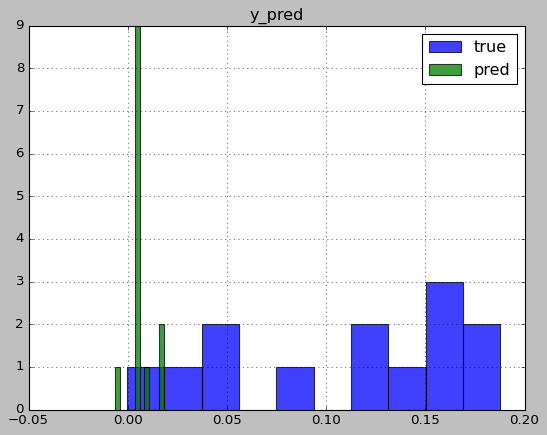

In [60]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [61]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [62]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [63]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    26
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.068583333, -0.072166667, 0.00071, 0.03167)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11682.16 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring dat

In [64]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [65]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -3.348338640037876


In [66]:
y_pred = predictor.predict(X_test)
y_pred

26    0.007901
27   -0.000884
28    0.004198
29    0.004174
30    0.002579
31    0.002419
32    0.001973
33    0.001647
34    0.001173
35    0.000770
36    0.000292
37   -0.000135
38   -0.000387
Name: target, dtype: float32

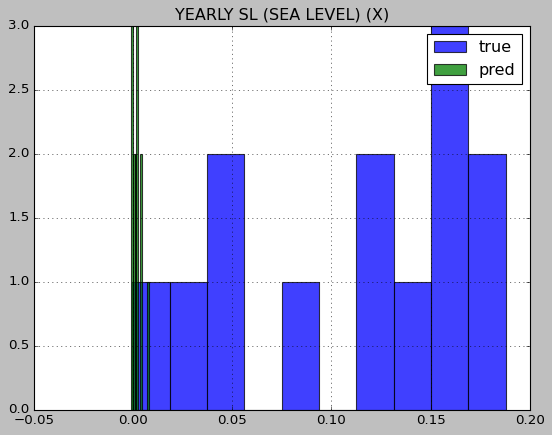

In [67]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [68]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.102173,-0.102173,-0.010439,-0.087819,-0.099414,-2.090163,-0.048155,0.006181,0.003450,0.006613,0.006181,0.003450,0.006613,1,True,2
1,KNeighborsUnif,-0.102544,-0.102544,-0.010515,-0.089474,-0.099300,-2.112615,-0.043575,0.012336,0.037855,0.010591,0.012336,0.037855,0.010591,1,True,1
2,ExtraTreesMSE,-0.104979,-0.104979,-0.011021,-0.090516,-0.102626,-2.262199,-0.047720,0.051134,0.044611,0.388645,0.051134,0.044611,0.388645,1,True,7
3,RandomForestMSE,-0.105403,-0.105403,-0.011110,-0.092032,-0.102626,-2.288611,-0.049420,0.064957,0.049713,0.384356,0.064957,0.049713,0.384356,1,True,5
4,XGBoost,-0.110689,-0.110689,-0.012252,-0.094782,-0.110065,-2.626739,-0.039553,0.049615,0.003985,0.091043,0.049615,0.003985,0.091043,1,True,9
5,CatBoost,-0.119453,-0.119453,-0.014269,-0.104938,-0.119781,-3.223754,-0.036907,0.002496,0.001444,0.132294,0.002496,0.001444,0.132294,1,True,6
6,LightGBMLarge,-0.120162,-0.120162,-0.014439,-0.105607,-0.120610,-3.274092,-0.037022,0.009259,0.002328,0.168781,0.009259,0.002328,0.168781,1,True,11
7,LightGBM,-0.120632,-0.120632,-0.014552,-0.106068,-0.121154,-3.307602,-0.036989,0.001835,0.001905,0.156358,0.001835,0.001905,0.156358,1,True,4
8,LightGBMXT,-0.120632,-0.120632,-0.014552,-0.106068,-0.121154,-3.307602,-0.036989,0.011545,0.002302,0.171251,0.011545,0.002302,0.171251,1,True,3
9,WeightedEnsemble_L2,-0.121201,-0.121201,-0.014690,-0.105741,-0.120748,-3.348339,-0.036466,0.065867,0.008667,0.513988,0.002289,0.000384,0.338620,2,True,12
